![](enunciado.png)


# 1.

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD


In [2]:

df = pd.read_csv('weight-height.csv')

print(df.head(5))


  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [3]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})



C:\Users\knd\AppData\Local\Temp\ipykernel_2508\226895169.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


In [4]:
df.head(5)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
A = df.values.tolist()
# A = [[3,7],[5,2]]
A[:5]


[[1.0, 73.847017017515, 241.893563180437],
 [1.0, 68.7819040458903, 162.3104725213],
 [1.0, 74.1101053917849, 212.7408555565],
 [1.0, 71.7309784033377, 220.042470303077],
 [1.0, 69.8817958611153, 206.349800623871]]

In [7]:
# Como a nossa matriz nao e nem simetrica e nem quadrada, vamos fazer a multiplicar A pela transposta de A

In [8]:
def transpose_matrix(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]


In [9]:

for column in transpose_matrix(A):
    print(column[:3])

[1.0, 1.0, 1.0]
[73.847017017515, 68.7819040458903, 74.1101053917849]
[241.893563180437, 162.3104725213, 212.7408555565]


In [10]:
C = np.dot(A, transpose_matrix(A))


In [11]:
# como podemos ver a trasposta a resultou em uma matriz quadrada e simetrica
C.shape

(10000, 10000)

In [16]:
C[:][6] == C[6][:]

array([ True,  True,  True, ...,  True,  True,  True])

In [17]:
# Calcular os autovalores e autovetores da matriz C
eigenvaluesC, eigenvectorsC = np.linalg.eig(C)


In [18]:
eigenvaluesC[0]

(314346920.2982065+0j)

In [19]:
eigenvectorsC[0][0]

(0.014213620343468798+0j)

In [20]:
len(eigenvaluesC), len(eigenvectorsC)


(10000, 10000)

In [21]:
#calculando os valores singulares

singular_valuesC = np.sqrt(np.abs(eigenvaluesC))
len(singular_valuesC)
singular_valuesC[0]


17729.83136688577

In [22]:
def get_sorted_indexes(lst):
    sorted_indexes = sorted(range(len(lst)), key=lambda i: lst[i], reverse=True)
    return sorted_indexes


In [39]:
# Ordenar os valores singulares em ordem decrescente
sorted_indices = get_sorted_indexes(singular_valuesC)
sorted_indices[:20]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 9, 10, 13, 14, 15, 16, 17, 18, 19]

In [24]:
sorted_singular_values = singular_valuesC[sorted_indices]

# Reordenar os eigenvetores na mesma ordem
sorted_eigenvectorsC = eigenvectorsC[:, sorted_indices]

In [25]:
# Fazendo a matriz na diagonal
sigma_sigma = np.diag(sorted_singular_values)

# podemos ver a ordem a seguir
for i in range(3):
    print(sigma_sigma[i][i])

17729.83136688577
888.8909998866502
29.631718760551934


In [43]:
sigma_sigma_df = pd.DataFrame(sigma_sigma)
sigma_sigma_df.iloc[:5, :5]


,0,1,2,3,4
0,17729.831367,0.000,0.000000,0.000000,0.000000
1,0.000000,888.891,0.000000,0.000000,0.000000
2,0.000000,0.000,29.631719,0.000000,0.000000
3,0.000000,0.000,0.000000,0.000279,0.000000
4,0.000000,0.000,0.000000,0.000000,0.000279


In [44]:
vetores_singulares_esquerda = []
for valor, vetor in zip(sorted_singular_values, sorted_eigenvectorsC.T):
    vetores_singulares_esquerda.append(np.dot(transpose_matrix(A), vetor) / valor)



In [28]:
len(vetores_singulares_esquerda), vetores_singulares_esquerda[0]

(10000, array([0.00316972+0.j, 0.37205979+0.j, 0.92820335+0.j]))

In [45]:
def percentual_soma_valores_singulares(valores_singulares, k):
    soma_k_maior = sum(valores_singulares[:k])  # Soma dos k maiores valores singulares
    soma_total = sum(valores_singulares)  # Soma total dos valores singulares
    percentual = (soma_k_maior / soma_total) * 100  # Calcula o percentual
    return percentual



In [46]:
for i in range(5):
    print(f"Os {i} maiores valores singulares representam {percentual_soma_valores_singulares(sorted_singular_values, i):.4f}% da soma total dos valores singulares")

Os 0 maiores valores singulares representam 0.0000% da soma total dos valores singulares
Os 1 maiores valores singulares representam 95.0736% da soma total dos valores singulares
Os 2 maiores valores singulares representam 99.8402% da soma total dos valores singulares
Os 3 maiores valores singulares representam 99.9990% da soma total dos valores singulares
Os 4 maiores valores singulares representam 99.9991% da soma total dos valores singulares


In [47]:
# dado o resultado acima acredito que assumindo um valor de k = 1, podemos representar 97.7022% dos dados
k = 1

In [48]:
def truncate_matrix_by_k(lst, k):
    truncated_lst = [row[:k] for row in lst[:k]]
    return truncated_lst

def truncate_column_by_k(lst, k):
    truncated_lst = lst[:k]
    return truncated_lst

def truncate_row_by_k(lst, k):
    truncated_lst = [row[:k] for row in lst]
    return truncated_lst



In [49]:
sigma_sigma_K = truncate_matrix_by_k(sigma_sigma,k)
sigma_sigma_K

[array([17729.83136689])]

In [50]:
sorted_eigenvectorsC_K = truncate_row_by_k(transpose_matrix(sorted_eigenvectorsC),k)
sorted_eigenvectorsC_K[:5]

[[(0.014213620343468798+0j)],
 [(-0.024128782568310303+0j)],
 [(0.018513198946595807+0j)],
 [(0.0028239390271638876-0.0020114060579825995j)],
 [(0.0028239390271638876+0.0020114060579825995j)]]

In [51]:
vetores_singulares_esquerda_K = truncate_column_by_k(vetores_singulares_esquerda,k)
vetores_singulares_esquerda_K

[array([0.00316972+0.j, 0.37205979+0.j, 0.92820335+0.j])]

In [52]:
A_K = np.dot(np.dot(sorted_eigenvectorsC_K,sigma_sigma_K),vetores_singulares_esquerda_K)

In [53]:
df_A_K = pd.DataFrame(A_K)
df_A = pd.DataFrame(A)

In [54]:
df_A.shape, df_A_K.shape

((10000, 3), (10000, 3))

In [55]:
df_A.head(5)

,0,1,2
0,1.0,73.847017,241.893563
1,1.0,68.781904,162.310473
2,1.0,74.110105,212.740856
3,1.0,71.730978,220.042470
4,1.0,69.881796,206.349801


In [56]:
df_A_K.head(5)

,0,1,2
0,0.798785+0.000000j,93.760963+ 0.000000j,233.911971+ 0.000000j
1,-1.356003+0.000000j,-159.166900+ 0.000000j,-397.084694+ 0.000000j
2,1.040415+0.000000j,122.123380+ 0.000000j,304.669658+ 0.000000j
3,0.158701-0.113038j,18.628276- 13.268356j,46.473251- 33.101486j
4,0.158701+0.113038j,18.628276+ 13.268356j,46.473251+ 33.101486j


In [57]:
#Pesquisei a seguinte forma de calcular a diferença entre as matrizes A e A_k

# Assuma que A é sua matriz original e A_k é a aproximação obtida pela SVD truncada
# Substitua A e A_k pelos seus respectivos valores/matriz

# Calculando a diferença entre as matrizes
difference_matrix = A - A_K

# Norma de Frobenius da diferença
frobenius_norm = np.linalg.norm(difference_matrix, 'fro')

# Norma Espectral da diferença
spectral_norm = np.linalg.norm(difference_matrix, 2)

print("Norma de Frobenius:", frobenius_norm)
print("Norma Espectral:", spectral_norm)


Norma de Frobenius: 17816.936686462777
Norma Espectral: 17794.724722391013


## Comentarios:

Sinceramente eu nao sei dizer se o processo que construi realmente conseguiu reduzir as dimensoes dos dados, eu entendo com clareza o objetivo do metodo de reduzir as dimensoes, e entendo como a conta funciona, porem acredito que fiz alguma conta errada, vou tentar novamente porem com a formula pronta

In [58]:
U, sigma, VT = np.linalg.svd(A)

# Selecionar k = 1, o maior valor singular e seus vetores singulares correspondentes
k = 1
U_k = U[:, :k]
Sigma_k = np.diag(sigma[:k])
VT_k = VT[:k, :]

# Reconstruir a aproximação da matriz A usando k = 1
A_K_func = U_k @ Sigma_k @ VT_k



In [63]:
df_A_K_funk = pd.DataFrame(A_K_func)
df_A = pd.DataFrame(A)
df_A.shape, df_A_K.shape, df_A_K_funk.shape


((10000, 3), (10000, 3), (10000, 3))

In [64]:
df_A_K_funk.head(5)

,0,1,2
0,0.798785,93.760963,233.911971
1,0.558667,65.576013,163.597025
2,0.713324,83.729577,208.885978
3,0.732001,85.921830,214.355143
4,0.689534,80.937126,201.919457


In [65]:
difference_matrix = A - A_K_func

# Norma de Frobenius da diferença
frobenius_norm = np.linalg.norm(difference_matrix, 'fro')

# Norma Espectral da diferença
spectral_norm = np.linalg.norm(difference_matrix, 2)

print("Norma de Frobenius:", frobenius_norm)
print("Norma Espectral:", spectral_norm)

Norma de Frobenius: 889.3847583786178
Norma Espectral: 888.8909998866486


# Comentario Final

Realemente quando fiz o processo pela funcao da lib teve uma melhora significativa, entao acredito que obtive um sucesso parcial, e a unica certeza que eu tive foi em relacao ao numero ideal de K

# 2.

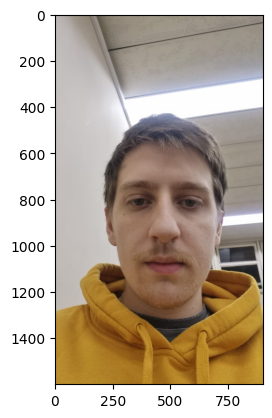

In [82]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to your image file
image_path = 'image.jpeg'

# Open the image file
img = Image.open(image_path)

# Display the image
plt.imshow(img)



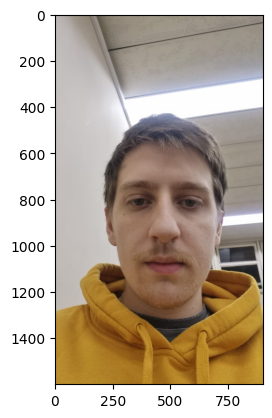

In [83]:
# img = image.resize((64, 64))
plt.imshow(img)


(1600, 900, 2)
<PIL.Image.Image image mode=LA size=900x1600 at 0x1D5FBA4DA10>


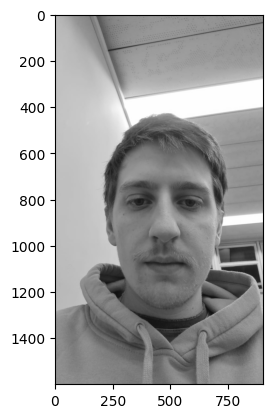

In [84]:
imggray = img.convert('LA')
print(np.shape(imggray))
print(imggray)

plt.imshow(imggray, cmap='gray');

(1440000,)
(1600, 900)


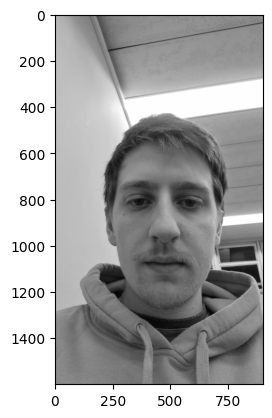

In [85]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
print(np.shape(imgmat))
# Reshape de acordo com as dimensões da imagem original
imgmat.shape = (imggray.size[1], imggray.size[0])
print(np.shape(imgmat))
# Plotando o resultado para mostrar que os dados não são alterados.
plt.imshow(imgmat, cmap='gray')
plt.show()

In [86]:
U, S, V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(S.shape)
print(V.shape)

(1600, 900)
(1600, 1600)
(900,)
(900, 900)


In [87]:
from sklearn.utils.extmath import randomized_svd
U, S, VT = randomized_svd(imgmat,
                              n_components=1,
                              n_iter=5,
                              random_state=None)

IndexError: index 5 is out of bounds for axis 0 with size 5

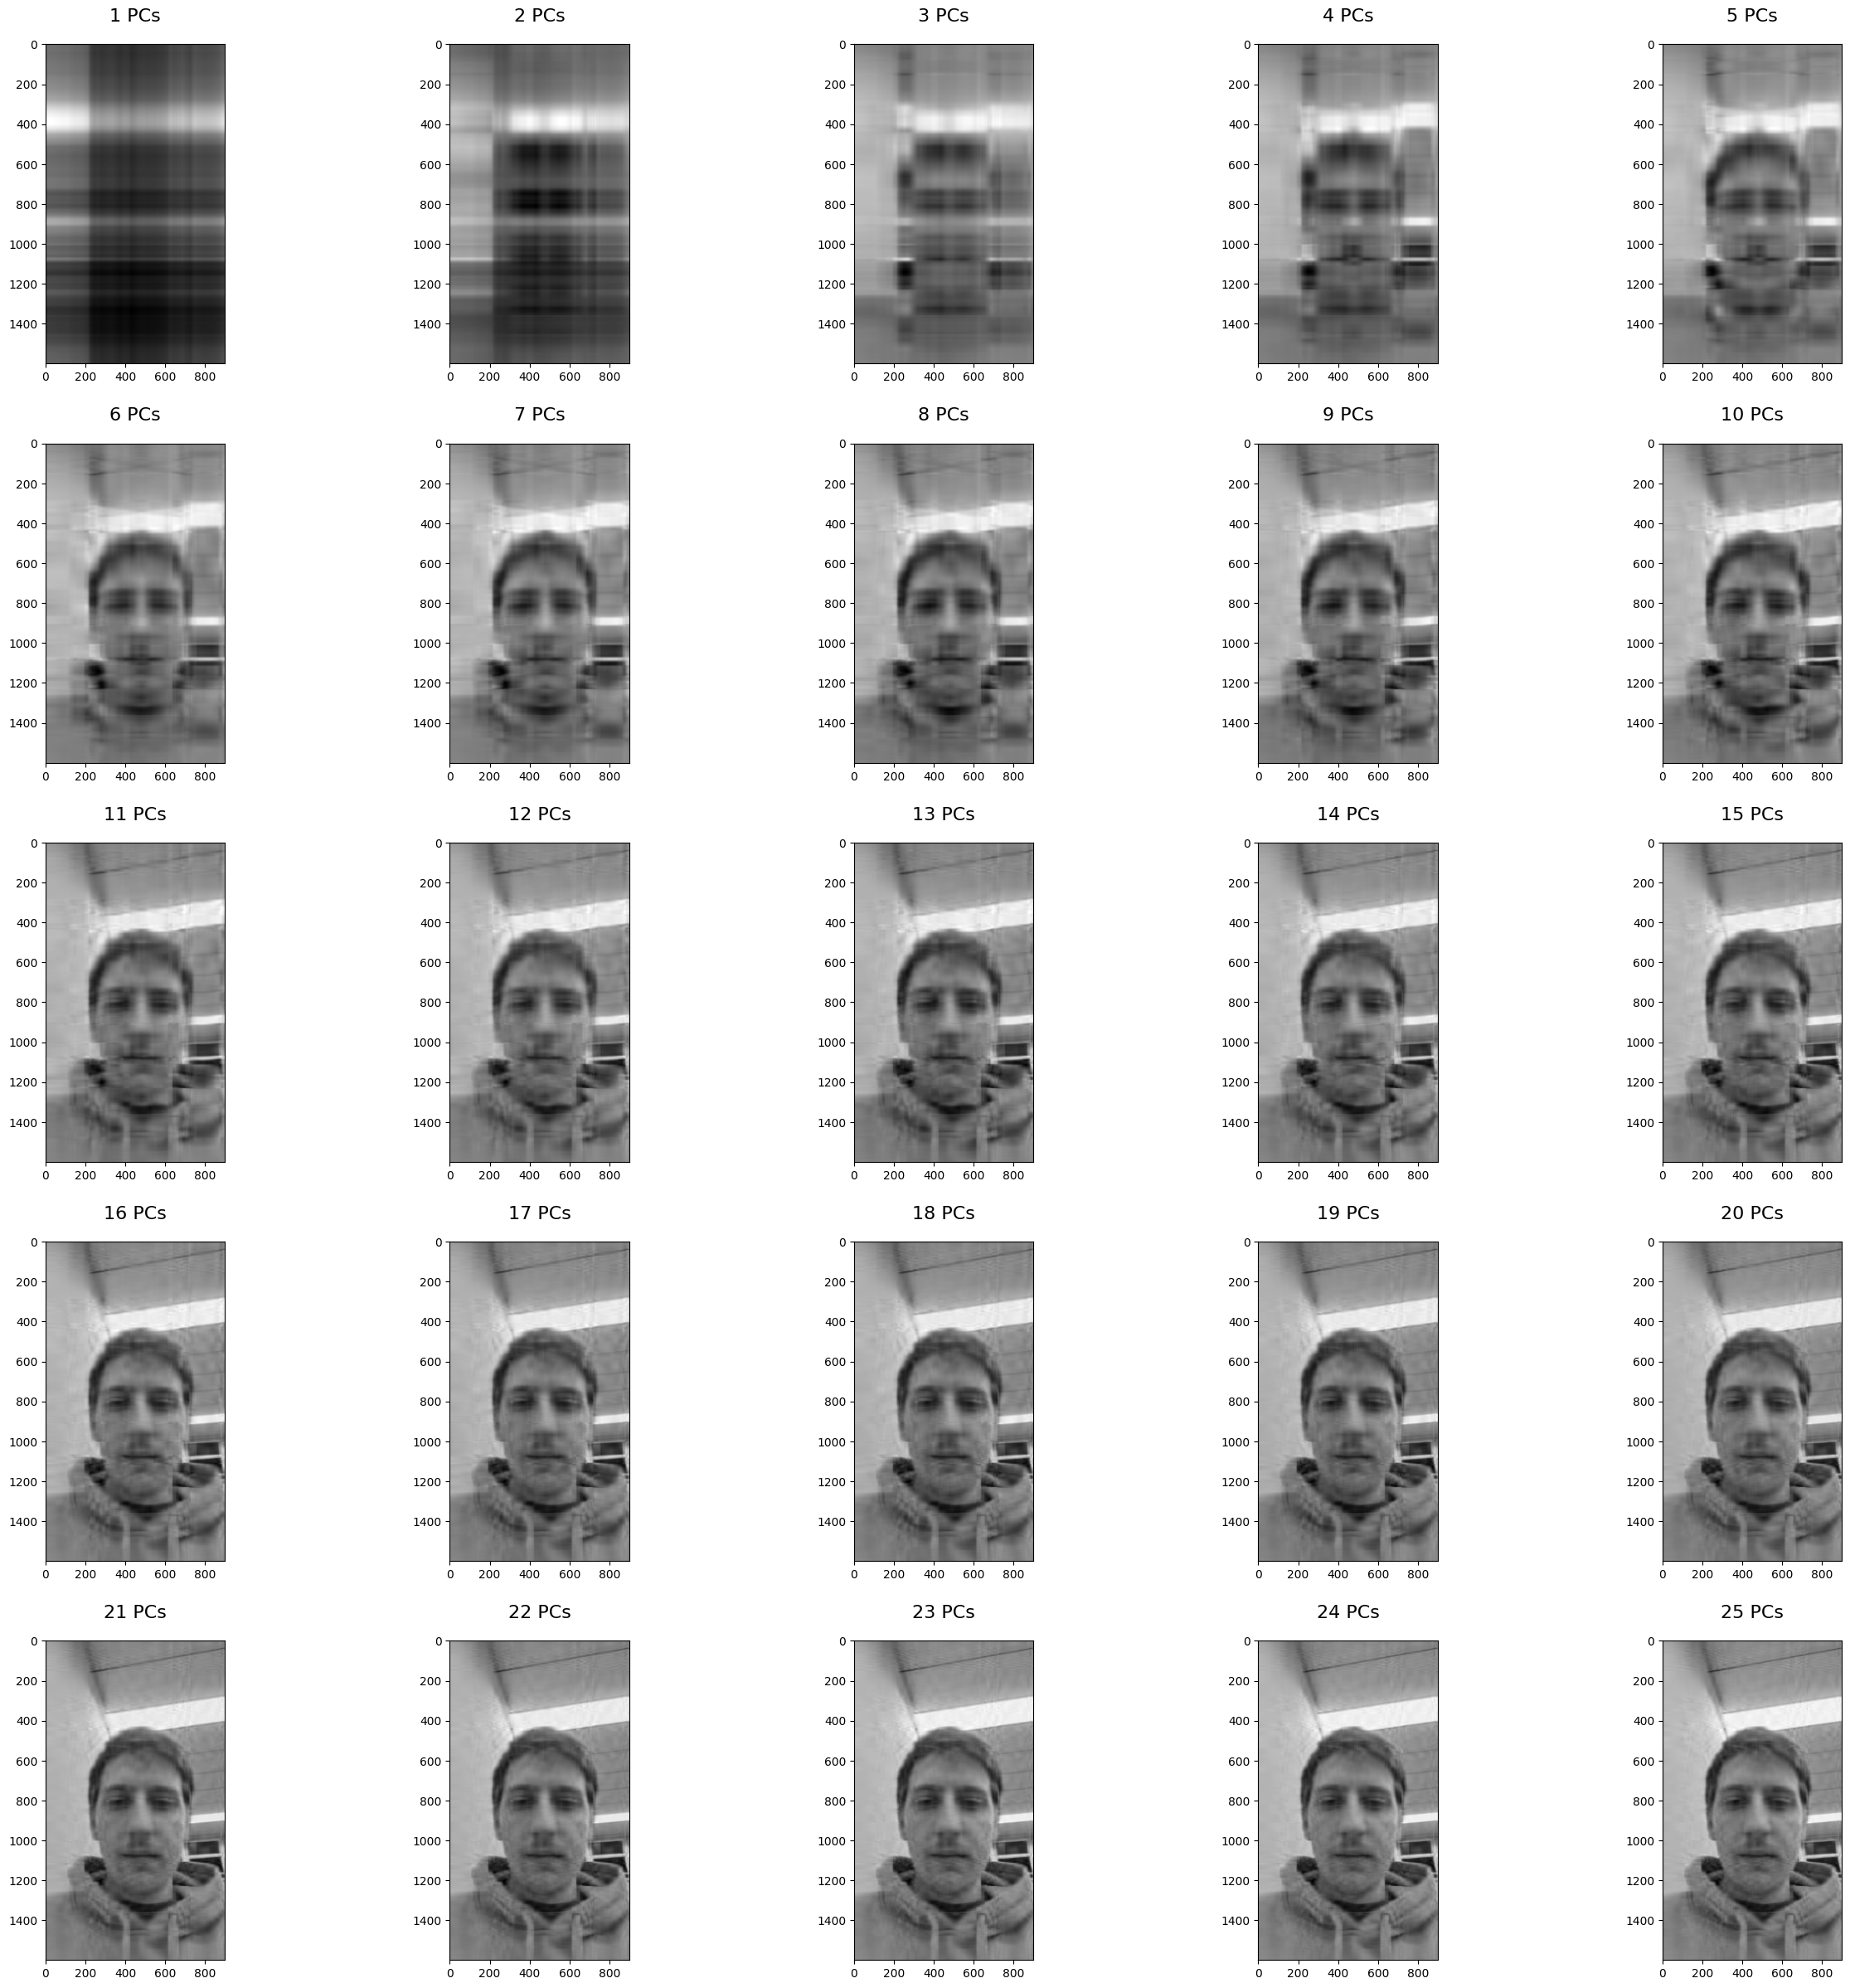

In [88]:
fig, axes = plt.subplots(5, 5, figsize=(30,30))
plt.subplots_adjust(wspace=0.3, hspace=0.25)

for i,j in enumerate(range(1, 101,1)):
    U, S, VT = randomized_svd(imgmat, n_components=j, n_iter=5,
                              random_state=None)
    reconstimg =   S* U @ VT

    axes[i // 5, i % 5].imshow(reconstimg, cmap='gray')
    axes[i // 5, i % 5].set_title("{0} PCs".format(j), y=1.05, fontsize=16)

plt.show()

# Conclusoes
Ao reduzir para 64x64 a imagem ficou muito ruim, entao fiz com o tamanha original, e ao observar acredito que 12ks esta bem aceitavel e reconhecivel